In [147]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
import numpy as np
import math
def getStockPrice(StockCode, Count = 500) :
    ret = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close','volumn'])
    
    url = "https://fchart.stock.naver.com/sise.nhn?symbol={}&timeframe=day&count={}&requestType=0"
    url = url.format(StockCode, Count)
    response = requests.get(url)
    
    e = ET.fromstring(response.text.replace('\n','').replace('\t',''))
    
    stock_history = []
    for item in e.find('chartdata').findall('item') :
        data = item.get('data').split('|')
        ret.loc[len(ret)] = data
        
    return ret

In [173]:
def qwert(code):
    a=getStockPrice(code)
    aa=pd.DataFrame()
    llist=[]
    for i in range(499):
        llist.append(math.log(float(a['close'][i+1])/float(a['close'][i])))
    
    aa['로그수익률']=llist
    v=np.std(aa['로그수익률'])*np.sqrt(252)
    return aa

In [149]:
aa['로그수익률'].sum()/len(aa['로그수익률'])

-0.00011523168683654743

In [150]:
np.std(aa['로그수익률'])*np.sqrt(252)

0.2578367555709772

In [151]:
np.cov(qwert('005930')['로그수익률'],qwert('000660')['로그수익률'])/np.std(aa['로그수익률'])*np.sqrt(252)

array([[0.25815693, 0.24317997],
       [0.24317997, 0.51885852]])

In [152]:
np.cov(qwert('005930')['로그수익률'],qwert('000660')['로그수익률'])

array([[0.00026414, 0.00024881],
       [0.00024881, 0.00053088]])

In [153]:
np.cov(qwert('005930')['로그수익률'],qwert('000660')['로그수익률'])/np.std(qwert('005930')['로그수익률'])*np.std(qwert('000660')['로그수익률'])

array([[0.00037446, 0.00035274],
       [0.00035274, 0.00075262]])

In [211]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import datetime as dt
import pandas as pd
import numpy as np
import requests

url='https://finance.naver.com/sise/sise_market_sum.nhn'
resp=requests.get(url)
soup=BeautifulSoup(resp.content)
tr=soup.find_all('tr')
listt=[] 
for i in tr:
    try:
        link=i.find('a')['href']
        listt.append(link)      
    except:
        pass
pp=[]       
for i in listt[:10]:
    pp.append(i[20:])
기준=pd.DataFrame(columns=pp)
for i in pp:
    기준[i]=qwert(i)['로그수익률']
기준['KOSPI']=qwert('KOSPI')['로그수익률']    
기준

,005930,000660,005935,005380,068270,051910,012330,005490,017670,055550,KOSPI
0,-0.013805,0.012423,-0.010466,-0.036701,0.006971,0.016202,-0.009775,-0.014870,0.019842,-0.023458,-0.004951
1,0.010059,0.003082,-0.000526,0.006211,-0.017529,0.024693,0.013659,0.007463,0.032853,0.006173,0.005432
2,-0.007114,0.000000,-0.000526,0.015361,0.001766,-0.012270,-0.003884,0.005561,-0.019194,0.001025,0.003466
3,0.013765,0.037740,0.008390,0.000000,0.006156,-0.003534,-0.005854,0.007367,0.000000,-0.005136,0.004220
4,0.000414,0.024873,0.003128,-0.021572,0.009607,0.001768,-0.007859,0.009132,0.022990,-0.001030,0.001376
5,-0.012500,-0.029328,-0.021042,-0.003120,-0.009607,-0.008873,0.003937,0.032203,0.007547,0.028457,-0.003933
6,0.005019,0.019160,0.010050,0.006231,-0.007922,0.005333,0.001963,-0.001762,-0.017062,0.000000,0.005483
7,-0.008379,-0.016189,-0.020203,-0.009360,0.017529,0.031416,-0.019803,0.012270,0.017062,-0.012097,-0.001617
8,-0.006754,-0.016455,0.004287,0.024769,0.003467,0.018724,0.033435,0.027493,0.031455,0.005058,0.001124
9,-0.004670,-0.007570,-0.011293,-0.031058,-0.022765,-0.022166,-0.031437,-0.013652,-0.039002,0.007039,-0.005847


In [ ]:
def corr10(i,j):
    np.cov(qwert(i)['로그수익률'],qwert(j)['로그수익률'])/np.std(qwert(i)['로그수익률'])*np.std(qwert(j)['로그수익률'])

In [219]:
기준.corr()

,005930,000660,005935,005380,068270,051910,012330,005490,017670,055550,KOSPI
005930,1.000000,0.664690,0.878384,0.044088,0.090229,0.296429,0.000251,0.196224,-0.028476,0.145554,0.719595
000660,0.664690,1.000000,0.595247,-0.020788,0.135933,0.230667,-0.057253,0.149917,-0.048168,-0.015944,0.548574
005935,0.878384,0.595247,1.000000,0.041597,0.088296,0.290286,-0.001370,0.173874,-0.022678,0.088226,0.643918
005380,0.044088,-0.020788,0.041597,1.000000,0.020334,0.095409,0.658866,0.172628,0.015690,0.196661,0.299270
068270,0.090229,0.135933,0.088296,0.020334,1.000000,0.118618,-0.012317,0.037837,-0.012896,-0.015122,0.278922
051910,0.296429,0.230667,0.290286,0.095409,0.118618,1.000000,0.089416,0.292973,0.086489,0.182018,0.508093
012330,0.000251,-0.057253,-0.001370,0.658866,-0.012317,0.089416,1.000000,0.185114,0.049706,0.194921,0.264110
005490,0.196224,0.149917,0.173874,0.172628,0.037837,0.292973,0.185114,1.000000,0.004144,0.282677,0.459891
017670,-0.028476,-0.048168,-0.022678,0.015690,-0.012896,0.086489,0.049706,0.004144,1.000000,0.147878,0.118219
055550,0.145554,-0.015944,0.088226,0.196661,-0.015122,0.182018,0.194921,0.282677,0.147878,1.000000,0.386436


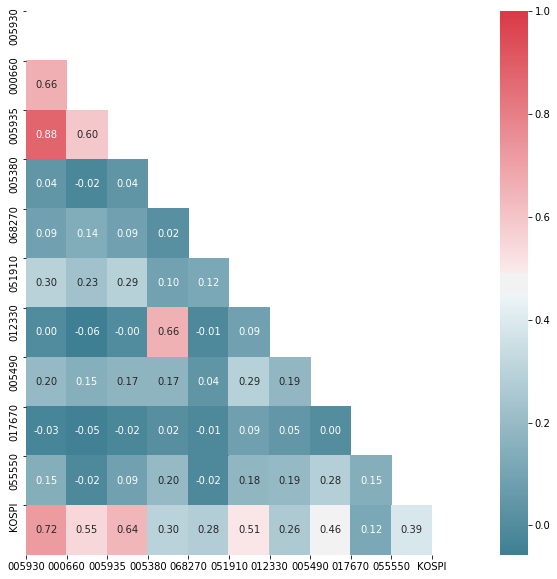

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt


import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

corr = 기준.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Drop self-correlations
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


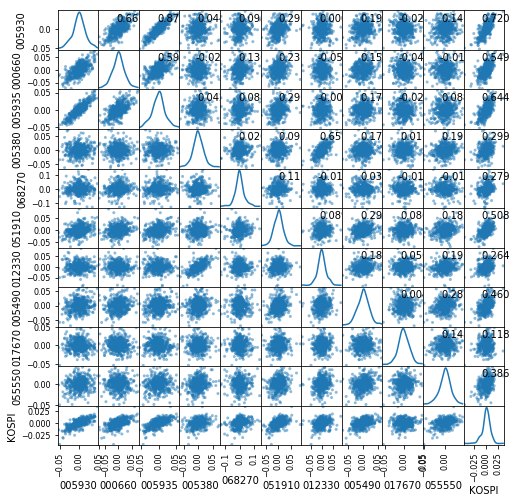

In [222]:
plt.rcParams["figure.figsize"] = (8,8)
axes = scatter_matrix(기준, alpha=0.5, diagonal='kde')
corr = 기준.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()